In [ ]:
import torchvision
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import pandas as pd

In [ ]:
model = torchvision.models.resnet18(pretrained=True)
num_classes = 6
model.fc = nn.Linear(model.fc.in_features, num_classes)
device = torch.device("cuda" if torch.cuda.is_available() else"cpu")
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 44.0MB/s]


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
train_path = datasets.ImageFolder('/content/drive/MyDrive/train',transform=transform)
test_path = datasets.ImageFolder('/content/drive/MyDrive/test', transform=transform)

train_loader = DataLoader(train_path, batch_size=32, shuffle=True)
test_loader = DataLoader(test_path, batch_size=32, shuffle=True)

In [ ]:
critirion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)

for epoch in range(5):
  model.train()
  running_loss = 0.0

  for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = critirion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

Predicted Class: Inclusion
Confidence Score: 0.9234356880187988


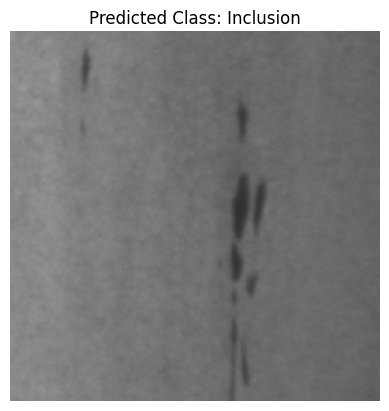

In [ ]:
#Testing and Loading

from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F

image_path = '/content/drive/MyDrive/test/Inclusion/In_1.bmp'
image = Image.open(image_path).convert('RGB')
transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
image_tensor = transform(image).unsqueeze(0).to(device)

model.eval()
with torch.no_grad():
  outputs = model(image_tensor)
  probabilities = F.softmax(outputs, dim=1)
  confidence, predicted_class_idx = torch.max(probabilities,1)

  class_name = train_path.classes
  predicted_label = class_name[predicted_class_idx.item()]
  confidence_score = confidence.item()
  print(f"Predicted Class: {predicted_label}")
  print(f"Confidence Score: {confidence_score}")
  plt.imshow(image)
  plt.title(f"Predicted Class: {predicted_label}")
  plt.axis('off')
  plt.show()